In [1]:
from IPython.display import Image

AI

Machine Learning

Neural Network

Deep Learning

# AI in general

https://www.tutorialspoint.com/artificial_intelligence/artificial_intelligence_overview.htm

A computer program without AI can answer the specific questions it is meant to solve.

A computer program with AI can answer the generic questions it is meant to solve.

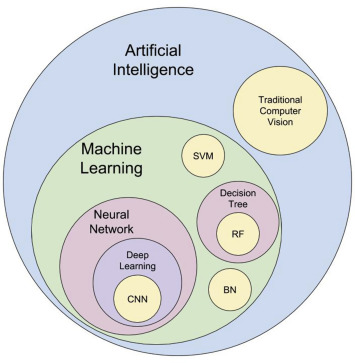

In [2]:
Image(filename='ai_venn.jpg', width = 700) 

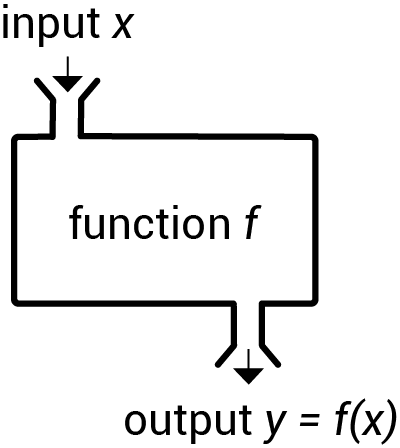

In [3]:
Image(filename='function.png', width = 500) 

## Why Python?

NumPy, Pandas, Scikit-Learn, Matplotlib, Tensorflow, PyTorch, Keras, OpenCV

# Machine Learning

Machine learning (“ML“) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying instead on patterns and inference derived from data.

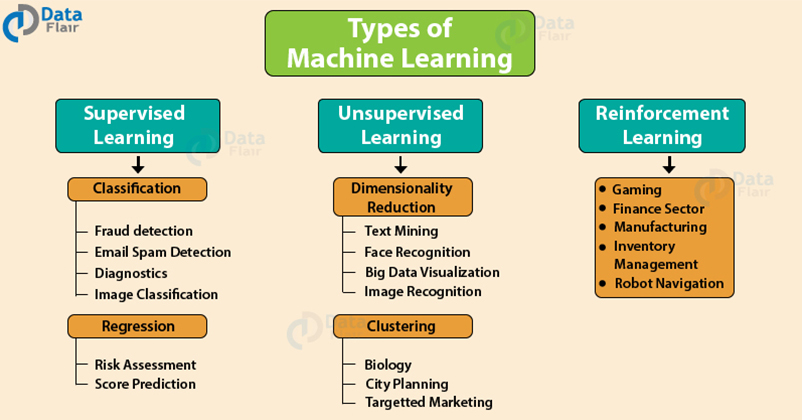

In [4]:
Image(filename='Types-of-Machine-Learning-algorithms.jpg', width = 900)

## Reinforcement Learning

An algorithm that learns to perform a task simply by trying to maximise rewards it receives for its actions.

This technique is most often used in game-like situations, e.g. playing games such as Go, self-driving cars, trading strategies, balancing electricity grid loads or optimising auction pricing in real time.

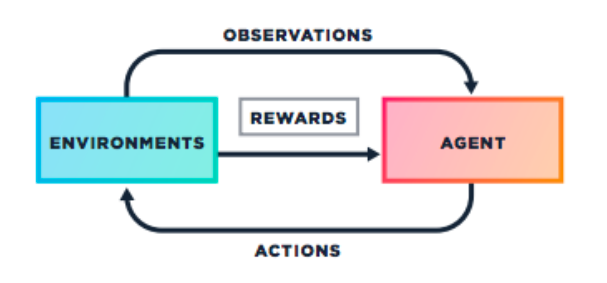

In [5]:
Image(filename='Reinforcement_Learning.png', width = 700)

## Supervised Learning

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

An algorithm uses training data and feedback from humans to learn the relationship of given inputs to desired outputs.

The training data is labelled by humans, e.g. photo X = cat, photo Y = potato etc. The labeling, together with the human-influenced feedback loop to improve the machine-generated results, explains why we term this type of ML “supervised”.

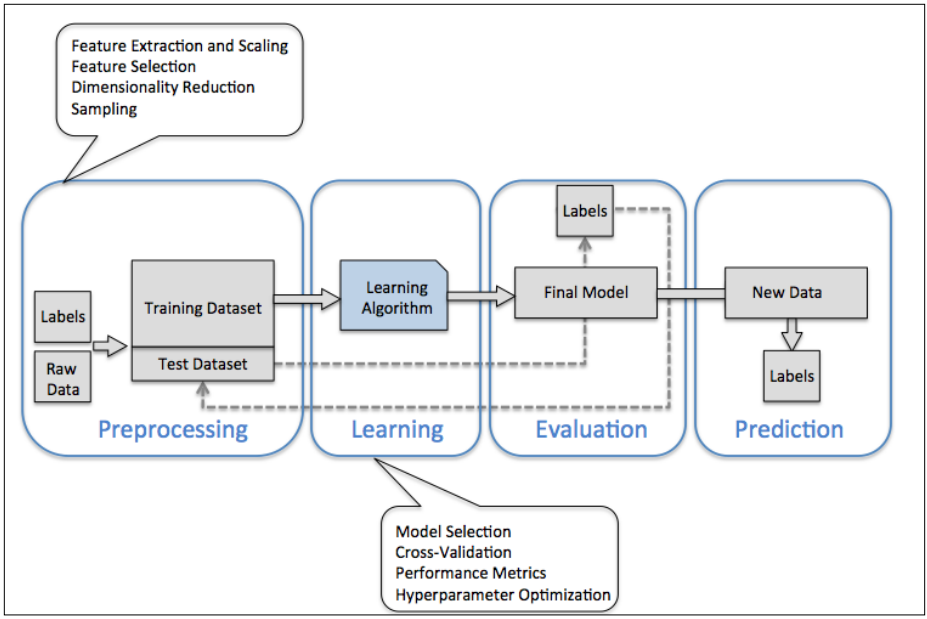

In [6]:
Image(filename='ml_road_map.png', width = 900)

### Classification

Classification is used to predict discrete responses, that is things with fixed values, e.g. number of students in a class (you can’t have half a student). In a legal context, ML classification algorithms are used to classify whether clause X describes French governing law or English governing law.

Eventually, the performance of a classifier, computational power as well as
predictive power, depends heavily on the underlying data that are available for
learning. The five main steps that are involved in training a machine learning
algorithm can be summarized as follows:
1. Selection of features.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

#### Perceptron

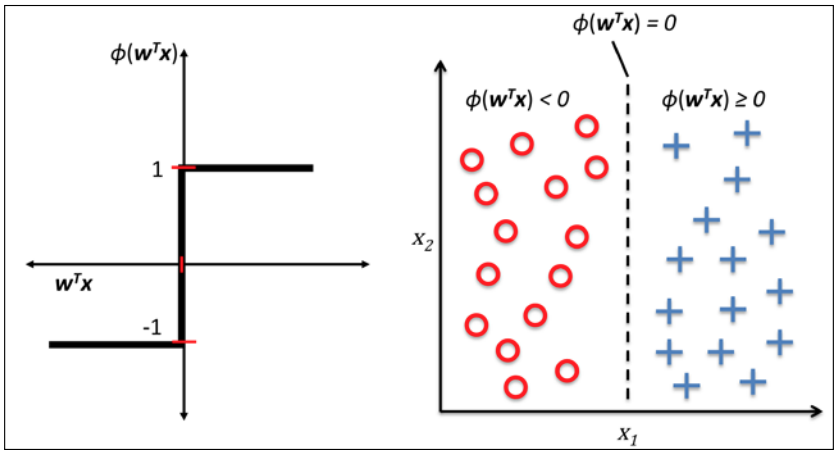

In [7]:
Image(filename='perceptron_1.png', width = 900)

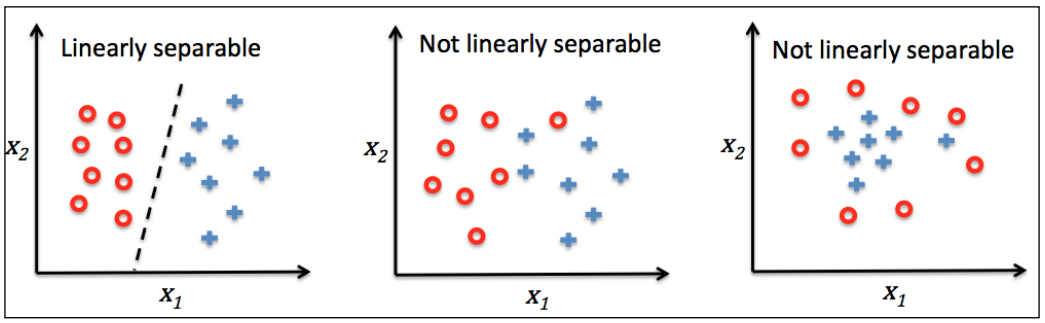

In [8]:
Image(filename='perceptron_2.png', width = 900)

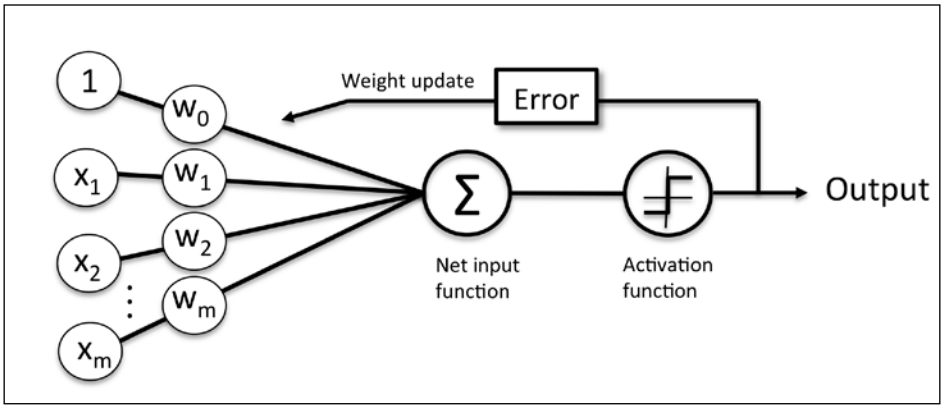

In [9]:
Image(filename='perceptron_3.png', width = 900)

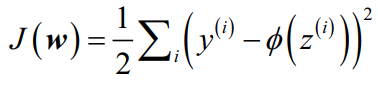

In [10]:
Image(filename='cost_func.png', width = 600)

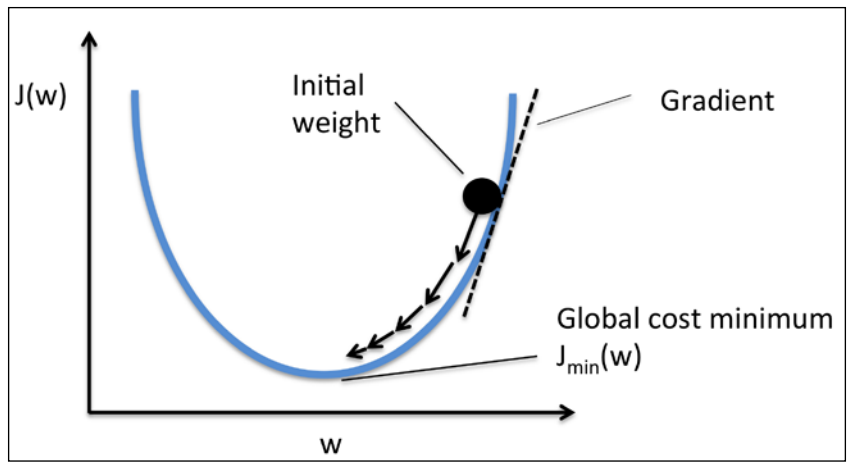

In [11]:
Image(filename='grad_desc.png', width = 800)

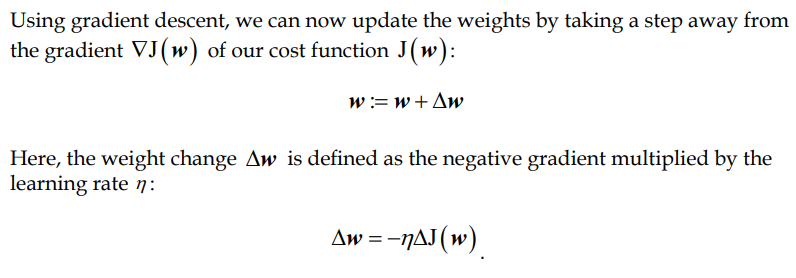

In [12]:
Image(filename='grad_desc_math.png', width = 900)

https://medium.com/@tiago.tmleite/neural-networks-multilayer-perceptron-and-the-backpropagation-algorithm-a5cd5b904fde

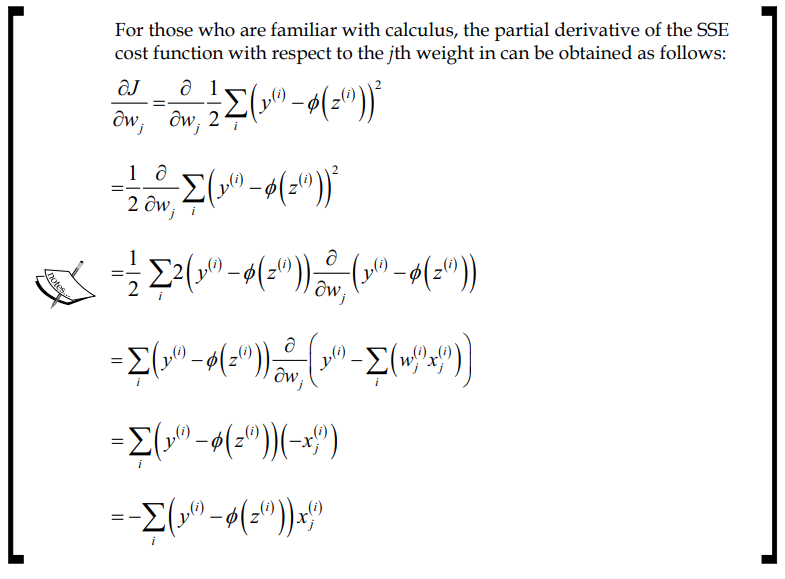

In [13]:
Image(filename='backprop_math.png', width = 900)

In [14]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [15]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

first feature column (sepal length) and the third feature column (petal length)

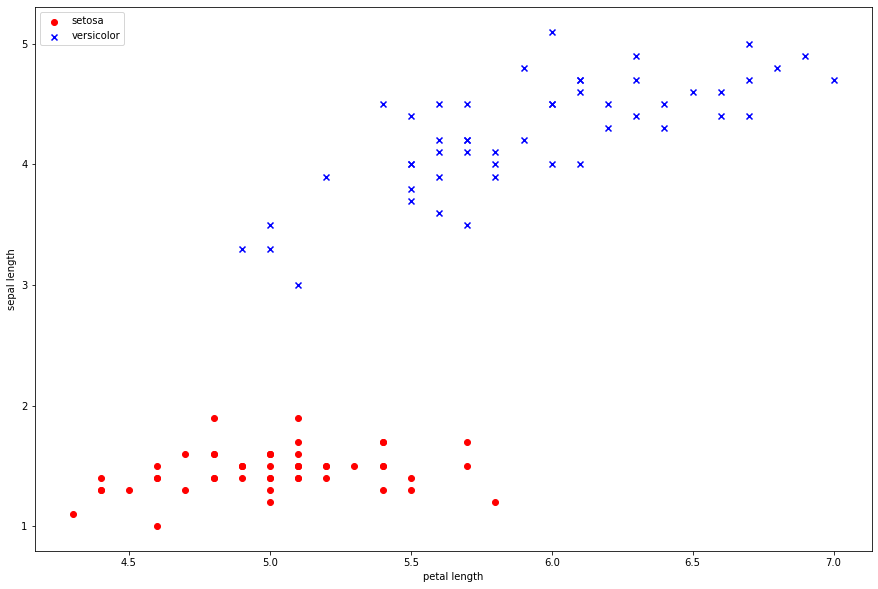

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15, 10)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [17]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

"""
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X, y)
"""

'\nfrom sklearn.linear_model import Perceptron\nppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)\nppn.fit(X, y)\n'

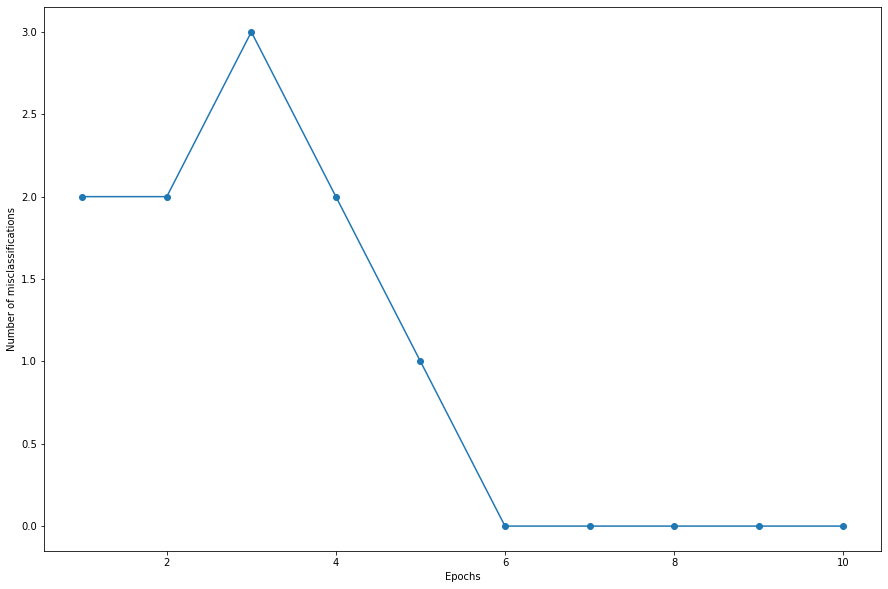

In [18]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


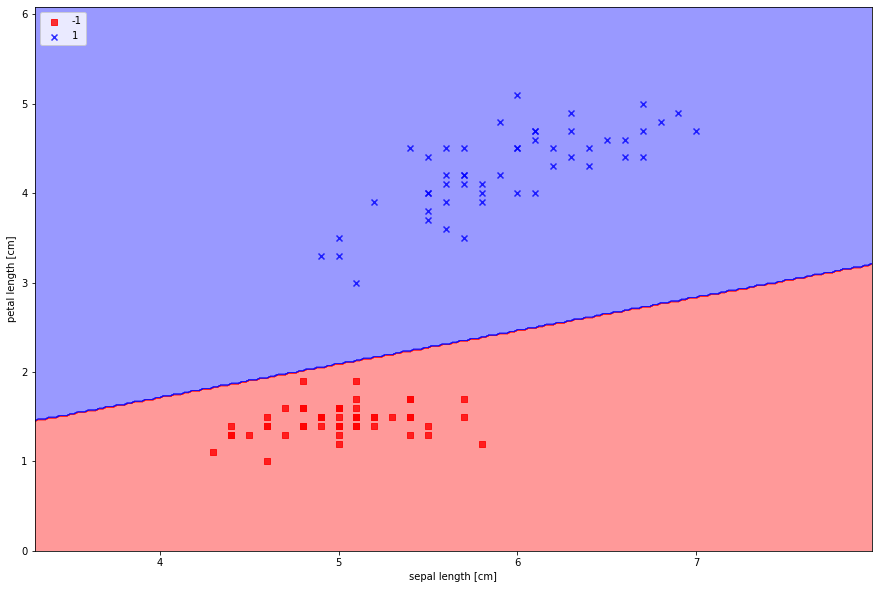

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

https://www.adrianstoll.com/ml/perceptron-learning-algorithm/

#### ADAptive LInear NEuron (Adaline)

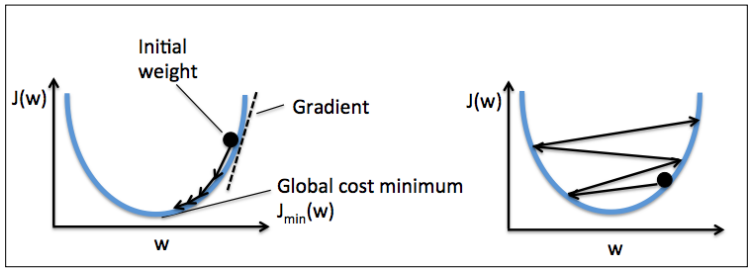

In [21]:
Image(filename='adaline.png', width = 1000)

#### SVM (support vector machine)

Another powerful and widely used learning algorithm is the support vector
machine (SVM), which can be considered as an extension of the perceptron. Using
the perceptron algorithm, we minimized misclassification errors. However, in SVMs,
our optimization objective is to maximize the margin. The margin is defined as the
distance between the separating hyperplane (decision boundary) and the training
samples that are closest to this hyperplane, which are the so-called support vectors. 

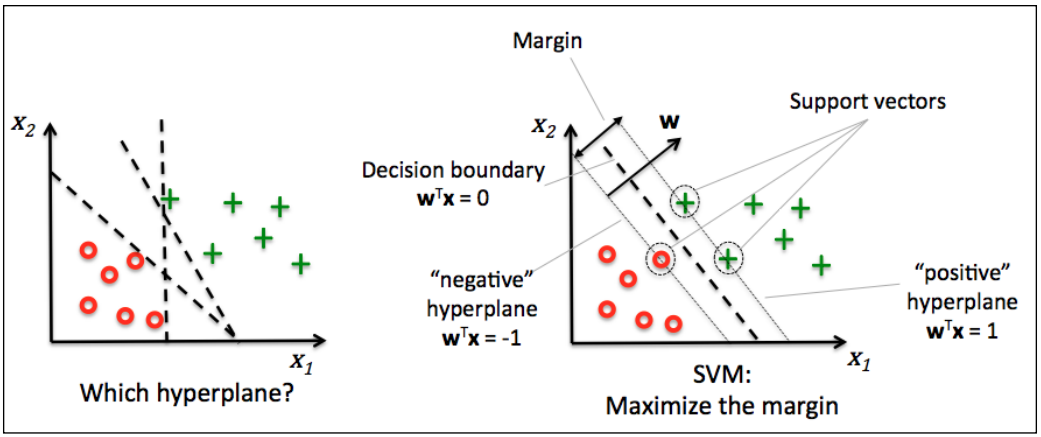

In [22]:
Image(filename='svm.png', width = 1000)

In [23]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
<ipython-input-19-f6f22df008c2>:23: Matplotlib

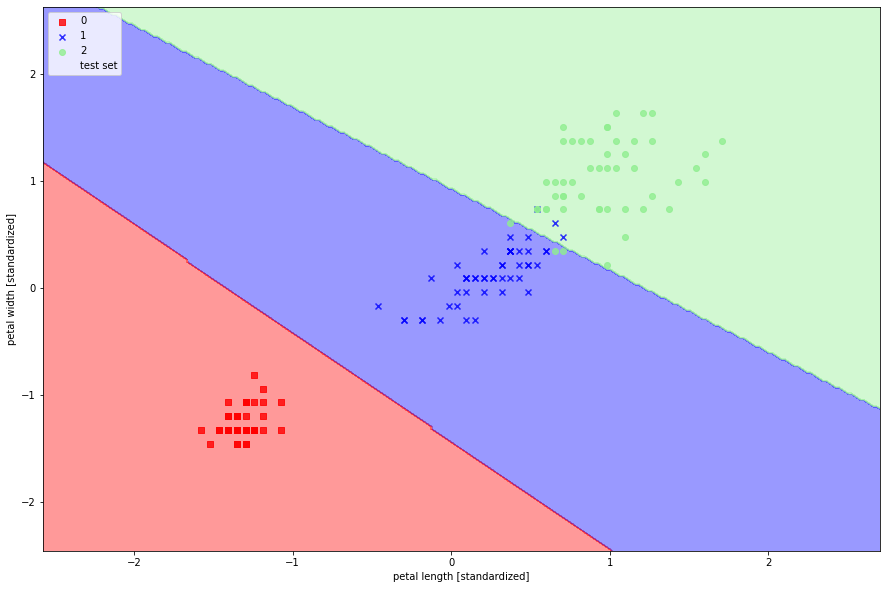

In [25]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#### SVM with RBF kerner (Radial Basis Function kernel)

XOR problem

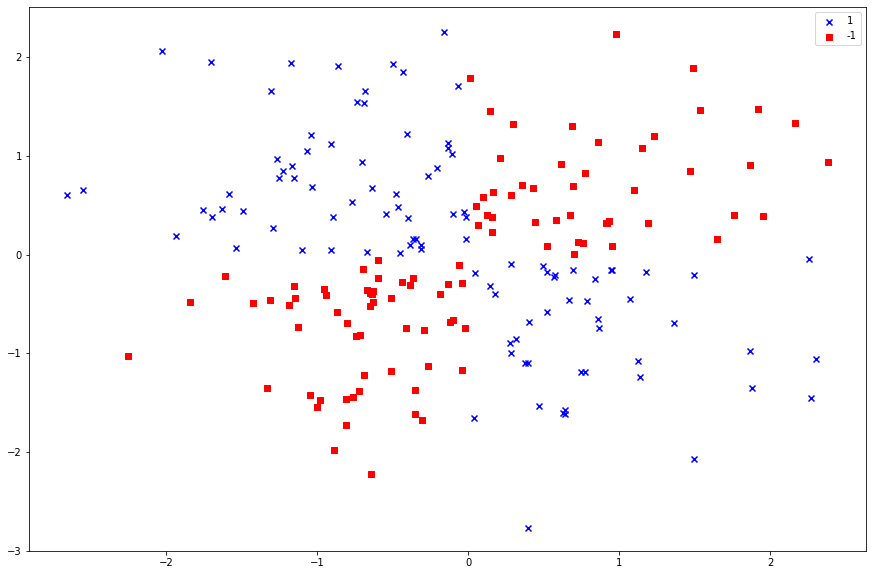

In [26]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [27]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


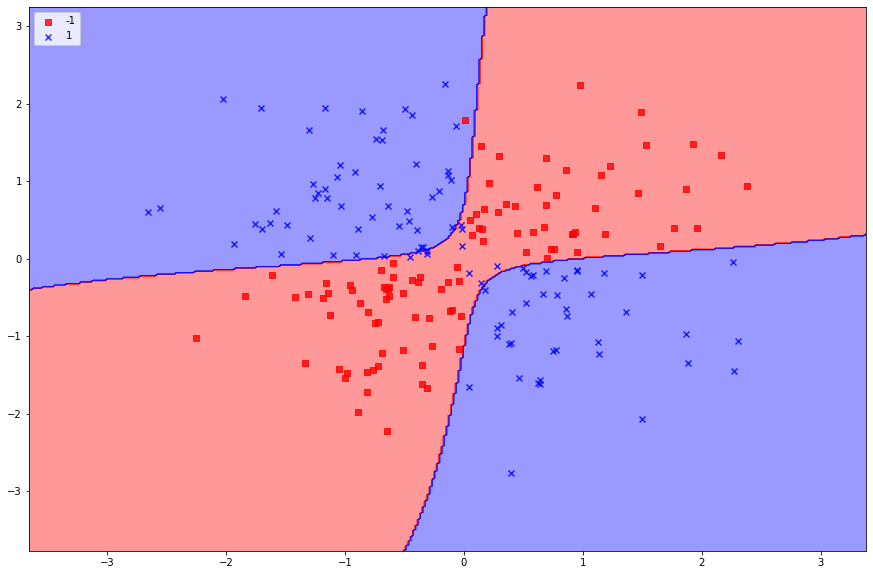

In [28]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

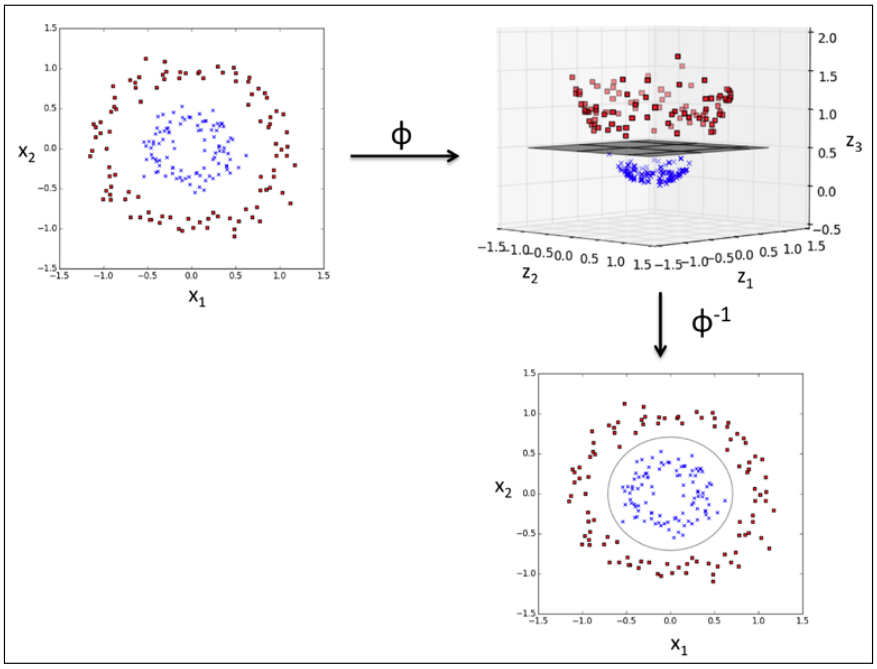

In [29]:
Image(filename='svm_rbf.png', width = 1000)

### Regression

Regression is used for predicting continuous responses, that is a value within a range, e.g. the height of students in a class is not fixed but rather a sliding scale of all possible human heights. In a legal context, ML regression algorithms could be used to predict the ideal fee quote for a matter with X, Y and Z variables.

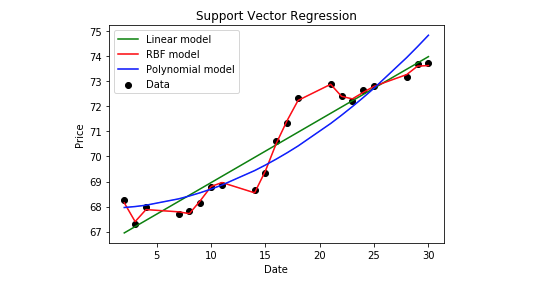

In [30]:
Image(filename='svm_reg.png', width = 1000)

## Unsupervised Learning

Unlike supervised learning, unsupervised learning does not require labelled data. This is because unsupervised learning techniques are designed to identify patterns inherent in the structure of the data.

For instance, in a legal context, you might use an unsupervised learning algorithm to identify logical groupings of contracts based on their shared syntax. Upon further human inspection, these groupings might reveal useful insights, e.g. documents with certain counterparties being more similar than not vs. documents without other counterparties.

### Dimensionality Reduction

#### PCA (Principal Component Analysis)

In [31]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [32]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [34]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
..                     ...                    ...             ...
145               1.870522               0.382822  Iris-virginica
146               1.558492              -0.905314  Iris-virginica
147               1.520845               0.266795  Iris-virginica
148               1.376391               1.016362  Iris-virginica
149               0.959299              -0.022284  Iris-virginica

[150 rows x 3 columns]

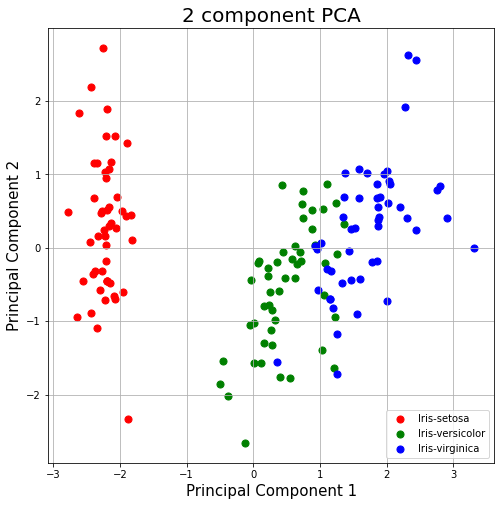

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

t-SNE (t-distributed stochastic neighbor embedding)

### Clustering

https://scikit-learn.org/stable/modules/clustering.html

##### MNIST

http://yann.lecun.com/exdb/mnist/

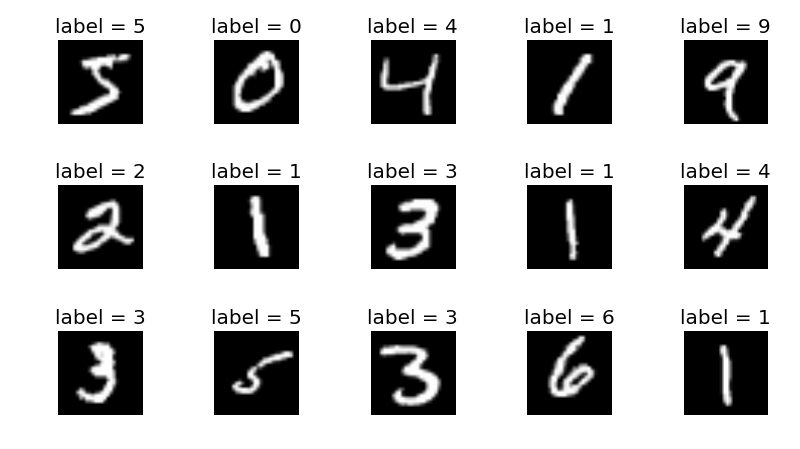

In [36]:
Image(filename='mnist.png', width = 1000)

#### K-Means clustering on the handwritten digits data

# digits: 10; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.143s	69662	0.680	0.719	0.699	0.570	0.695	0.172
random   	0.362s	69707	0.675	0.716	0.694	0.560	0.691	0.171
PCA-based	0.244s	74152	0.653	0.683	0.668	0.539	0.664	0.150
__________________________________________________________________________________


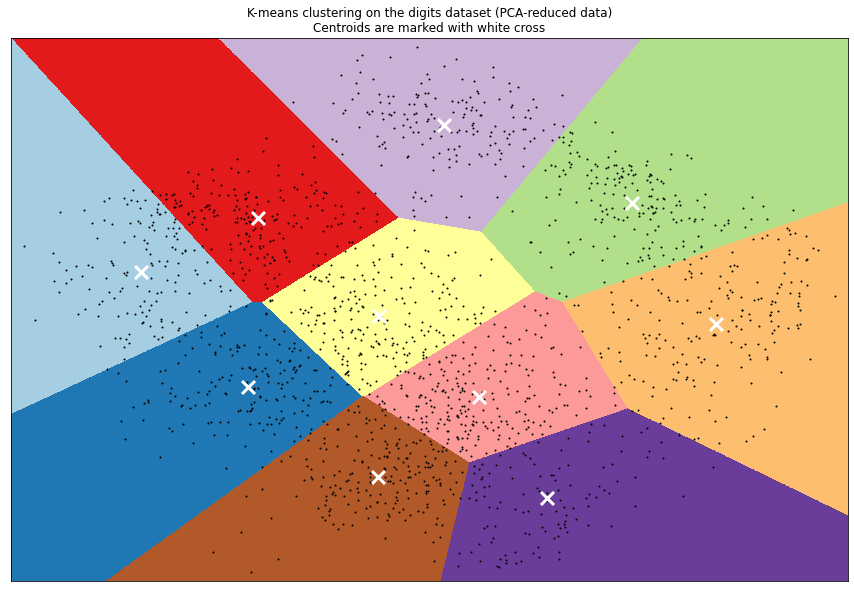

In [37]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# %%
# Define our evaluation benchmark
# -------------------------------
#
# We will first our evaluation benchmark. During this benchmark, we intend to
# compare different initialization methods for KMeans. Our benchmark will:
#
# * create a pipeline which will scale the data using a
#   :class:`~sklearn.preprocessing.StandardScaler`;
# * train and time the pipeline fitting;
# * measure the performance of the clustering obtained via different metrics.
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
from matplotlib.colors import Normalize

cmap = cm.autumn
norm = Normalize(vmin=0, vmax=9)
colors = [cmap(norm(label)) for label in labels]

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [metrics.silhouette_score(data, estimator[-1].labels_, metric="euclidean", sample_size=300,)]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))


# %%
# Run the benchmark
# -----------------
#
# We will compare three approaches:
#
# * an initialization using `kmeans++`. This method is stochastic and we will
#   run the initialization 4 times;
# * a random initialization. This method is stochastic as well and we will run
#   the initialization 4 times;
# * an initialization based on a :class:`~sklearn.decomposition.PCA`
#   projection. Indeed, we will use the components of the
#   :class:`~sklearn.decomposition.PCA` to initialize KMeans. This method is
#   deterministic and a single initialization suffice.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

# %%
# Visualize the results on PCA-reduced data
# -----------------------------------------
#
# :class:`~sklearn.decomposition.PCA` allows to project the data from the
# original 64-dimensional space into a lower dimensional space. Subsequently,
# we can use :class:`~sklearn.decomposition.PCA` to project into a
# 2-dimensional space and plot the data and the clusters in this new space.
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Neural Networks

## MLP (multi-layer perceptron)

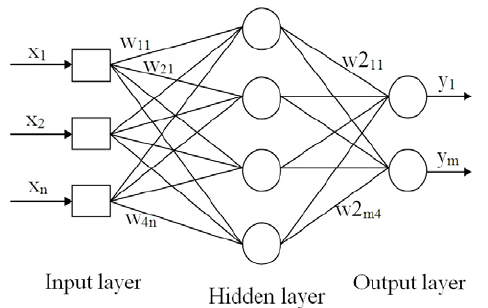

In [38]:
Image(filename='mlp.png', width = 800)

### MNIST

In [39]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


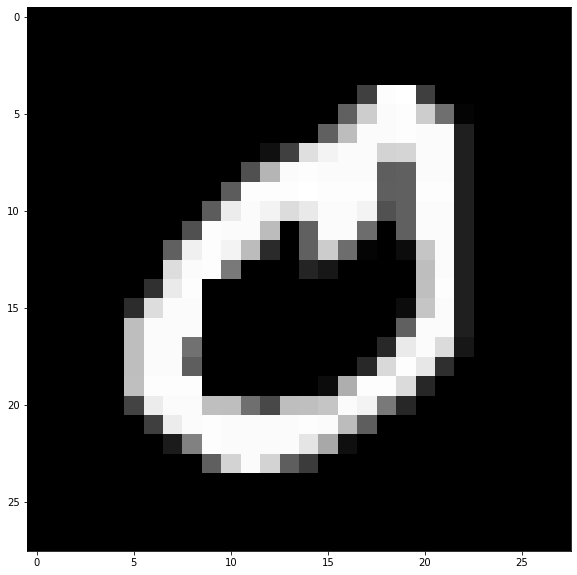

In [40]:
print(y_train[21])
plt.imshow(X_train[21], cmap='gray')

2


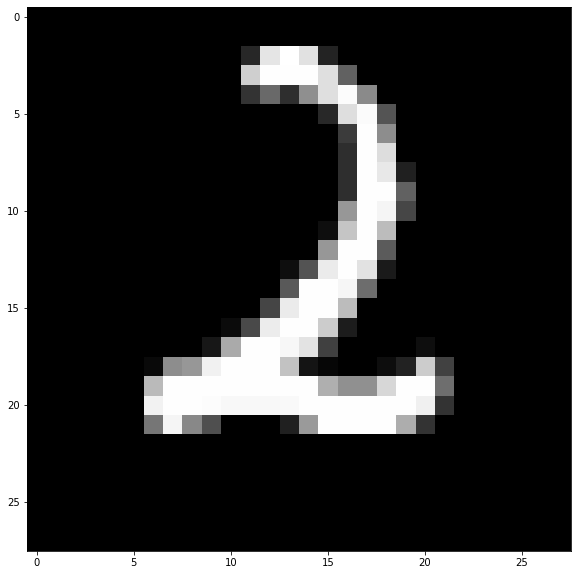

In [41]:
print(y_train[122])
plt.imshow(X_train[122], cmap='gray')

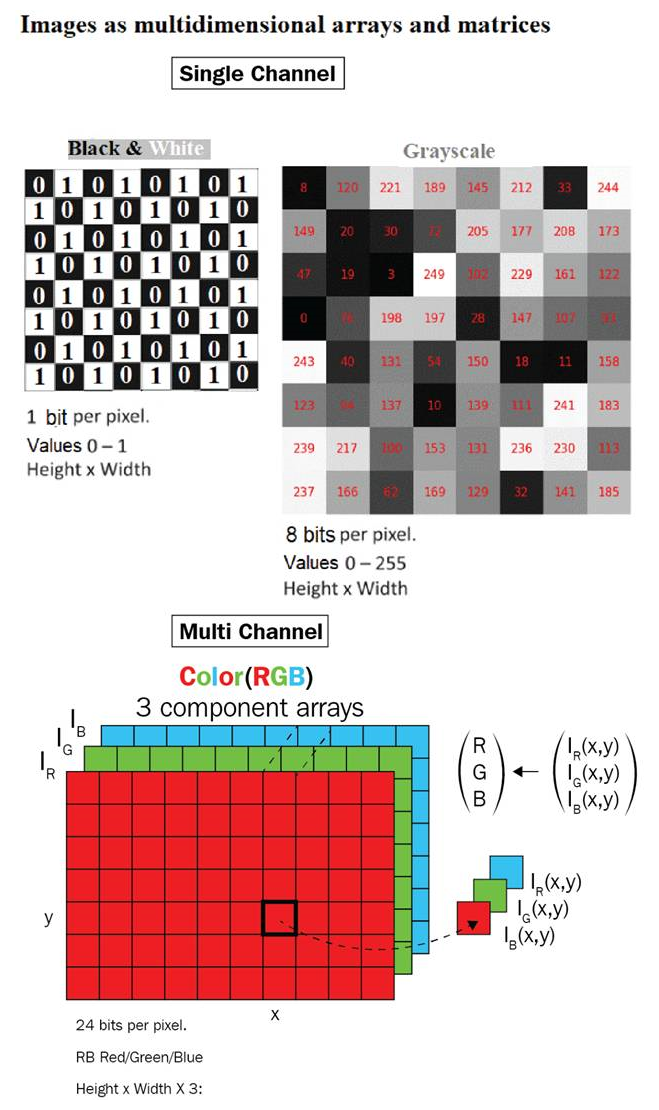

In [42]:
Image(filename='gray_rgb.png', width = 900)

In [43]:
print("max: ", X_train.max())
print("min: ", X_train.min())

max:  255
min:  0


#### Normalization

In [44]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [45]:
print("max: ", X_train.max())
print("min: ", X_train.min())

max:  1.0
min:  0.0


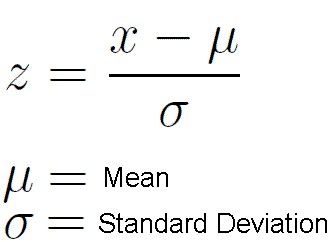

In [46]:
Image(filename='norm.jpg', width = 600)

#### 28 x 28 --> 784

In [47]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (60000, 28, 28)
X_test:  (10000, 28, 28)


In [48]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [49]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (60000, 784)
X_test:  (10000, 784)


#### One-Hot vector

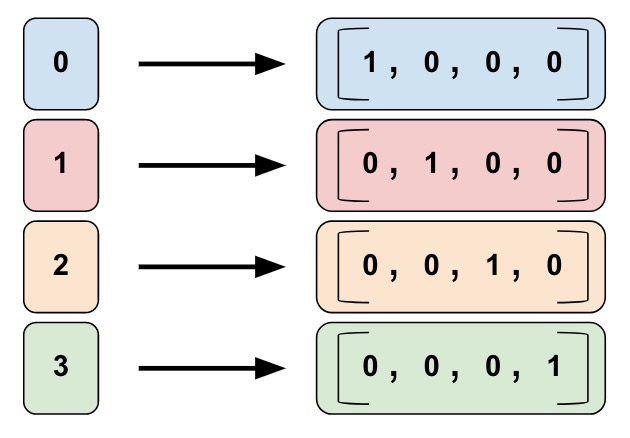

In [50]:
Image(filename='one_hot.jpg', width = 800)

In [51]:
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (60000,)
y_test:  (10000,)


In [52]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [53]:
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (60000, 10)
y_test:  (10000, 10)


In [54]:
print(y_train[122])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Model definition

In [55]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [56]:
ip = Input(shape=(784,), name="input")
x = Dense(units=512, name="hiddel_layer", activation="relu")(ip)
op = Dense(units=10, name="prediction", activation="softmax")(x)

model = Model(inputs=ip, outputs=op, name="full_model")

In [57]:
model.summary()

Model: "full_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hiddel_layer (Dense)         (None, 512)               401920    
_________________________________________________________________
prediction (Dense)           (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [58]:
print(784 * 512)

401408


In [59]:
print(784 * 512 + 512)

401920


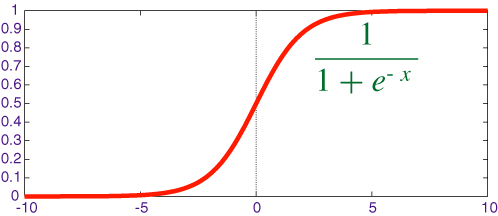

In [60]:
Image(filename='sigmoid.jpg', width = 800)

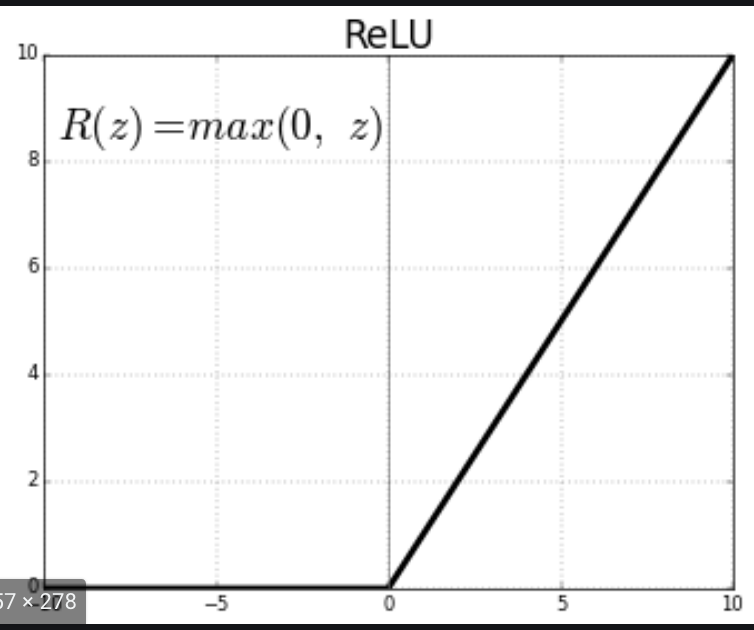

In [61]:
Image(filename='relu.png', width = 800)

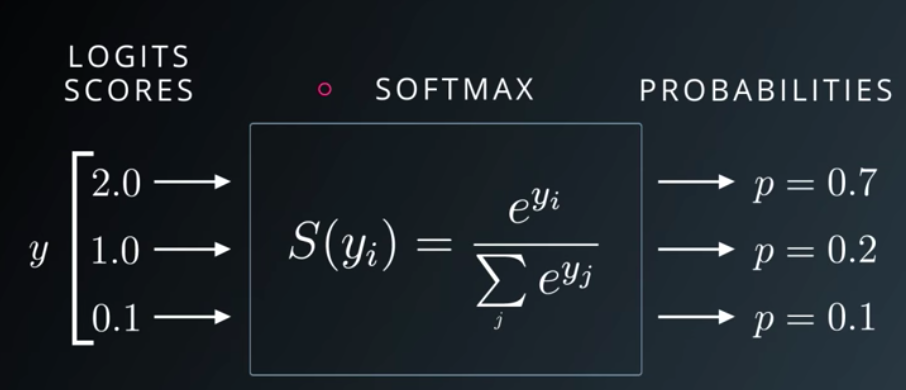

In [62]:
Image(filename='softmax.png', width = 800)

In [63]:
learning_rate = 0.001
optimizer = Adam(learning_rate, amsgrad=True)

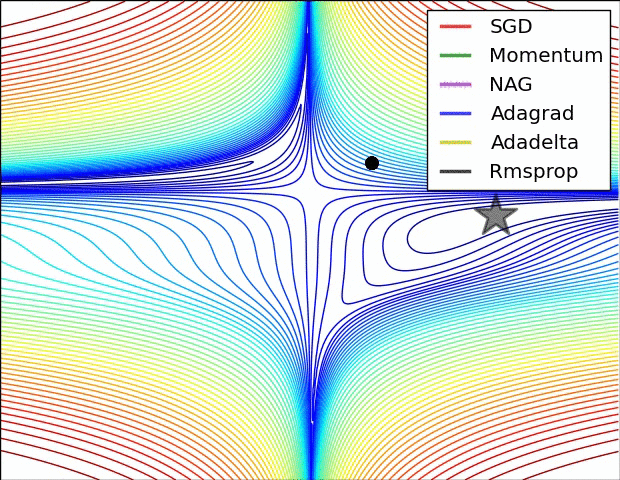

In [64]:
Image(filename='optimizers.gif', width = 800)

In [65]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

### Model training

In [66]:
history = model.fit(X_train,
                   y_train,
                   batch_size=100,
                   epochs=5,
                   verbose=1,
                   validation_data=(X_test, y_test))

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.4341 - accuracy: 0.8784 - val_loss: 0.1276 - val_accuracy: 0.9623
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1122 - accuracy: 0.9679 - val_loss: 0.0848 - val_accuracy: 0.9750
Epoch 3/5
600/600 [==============================] - 3s 6ms/step - loss: 0.0661 - accuracy: 0.9806 - val_loss: 0.0746 - val_accuracy: 0.9764
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0456 - accuracy: 0.9871 - val_loss: 0.0637 - val_accuracy: 0.9794
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0311 - accuracy: 0.9916 - val_loss: 0.0616 - val_accuracy: 0.9807


In [67]:
history.history

{'loss': [0.2521846890449524,
  0.10236415266990662,
  0.06421687453985214,
  0.04410775005817413,
  0.03190538287162781],
 'accuracy': [0.9285333156585693,
  0.9704833626747131,
  0.9807999730110168,
  0.9873666763305664,
  0.991349995136261],
 'val_loss': [0.12758000195026398,
  0.08480282127857208,
  0.07459064573049545,
  0.06370025873184204,
  0.061553314328193665],
 'val_accuracy': [0.9623000025749207,
  0.9750000238418579,
  0.9764000177383423,
  0.9793999791145325,
  0.9807000160217285]}

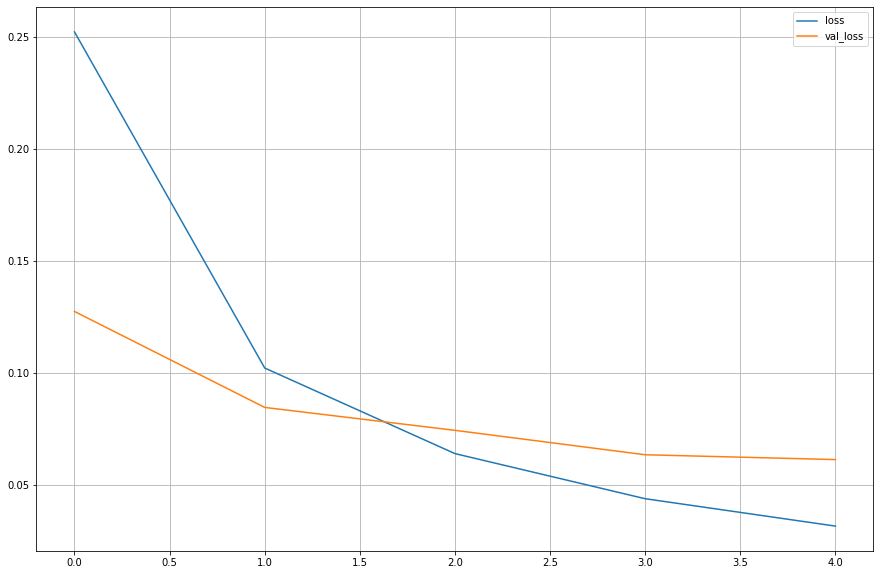

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.gca().legend(('loss','val_loss'))
plt.grid()

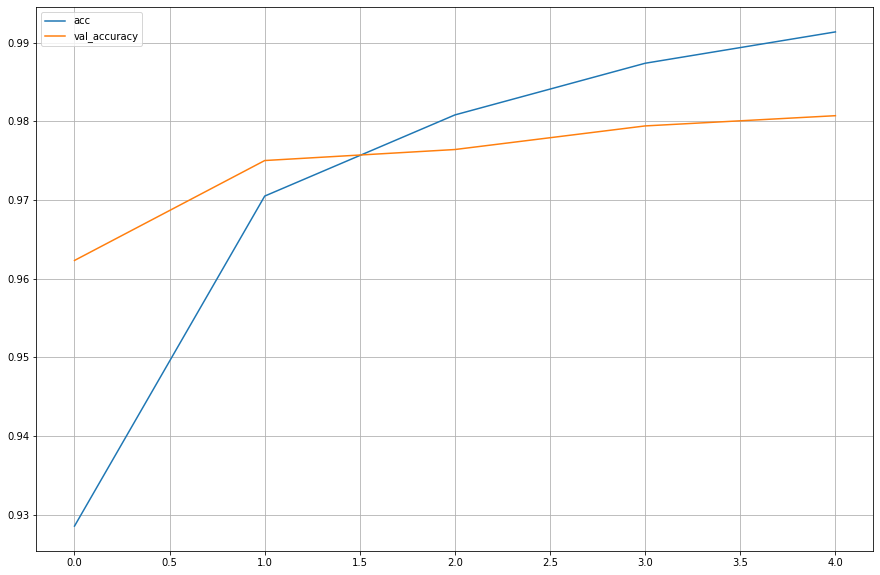

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.gca().legend(('acc','val_accuracy'))
plt.grid()

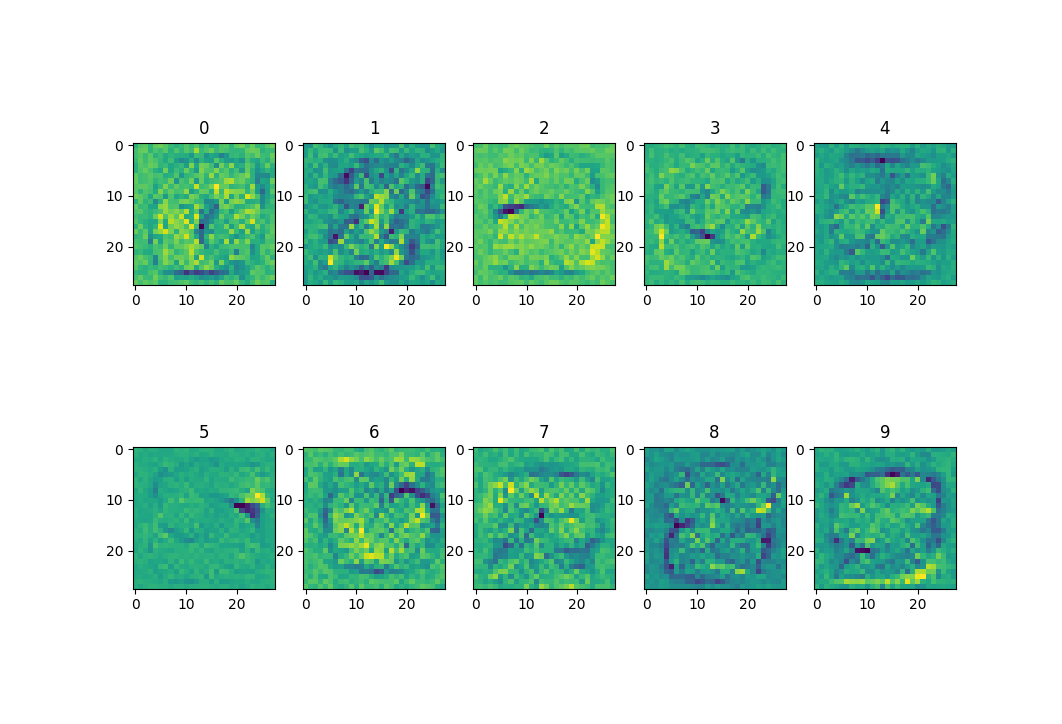

In [70]:
Image(filename='mnist_heatmap.png', width = 1000)

(28, 28)


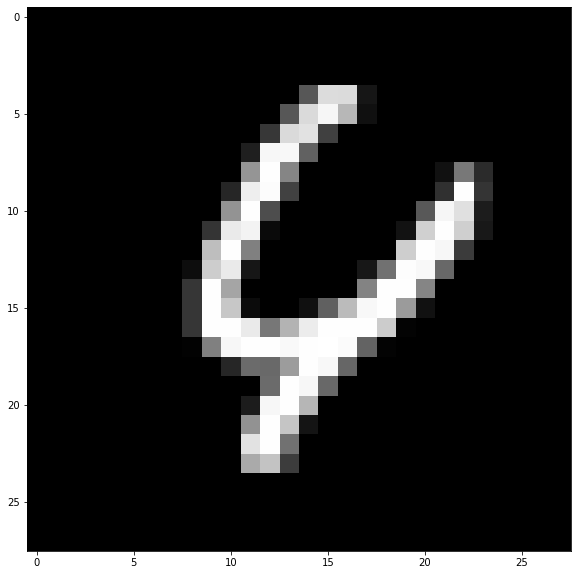

In [71]:
origin = X_test[121].reshape(28, 28)
print(origin.shape)
plt.imshow(origin, cmap='gray')

In [72]:
prediction = model.predict(X_test[121].reshape(1, -1), batch_size=1)
print(prediction)

[[4.7902235e-05 1.3852308e-07 2.4711431e-04 3.4314473e-06 9.9425042e-01
  1.3488045e-06 3.4623970e-03 4.5171048e-04 1.1225684e-03 4.1289639e-04]]


([<matplotlib.axis.XTick at 0x7f7197c6d430>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

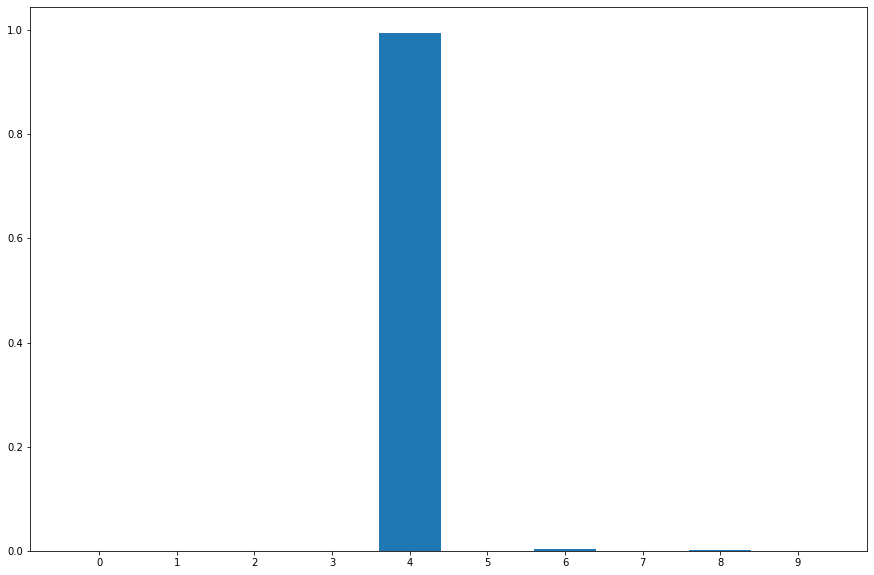

In [73]:
plt.bar(range(10), prediction[0])
plt.xticks(range(10), range(10))

In [74]:
prediction.argmax()

4

(28, 28)


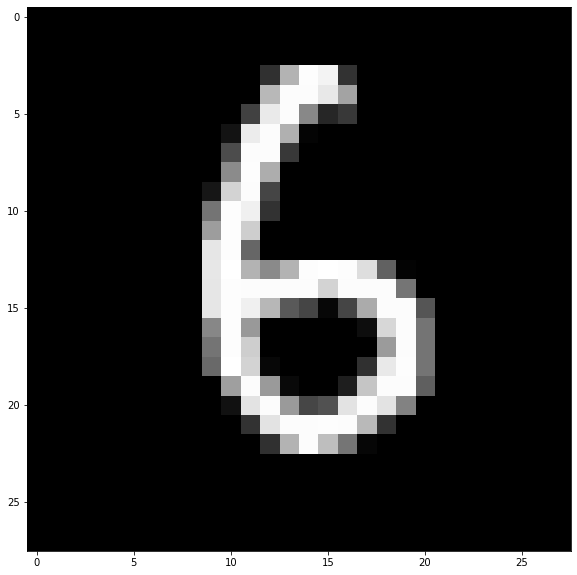

In [75]:
origin = X_test[21].reshape(28, 28)
print(origin.shape)
plt.imshow(origin, cmap='gray')

In [76]:
prediction = model.predict(X_test[21].reshape(1, -1), batch_size=1)
print(prediction)

[[1.9356139e-06 7.2424200e-09 1.5468122e-07 5.3800414e-07 1.0326090e-06
  8.4984466e-04 9.9913305e-01 2.3612930e-08 1.3185706e-05 2.5284621e-07]]


([<matplotlib.axis.XTick at 0x7f7168610ca0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

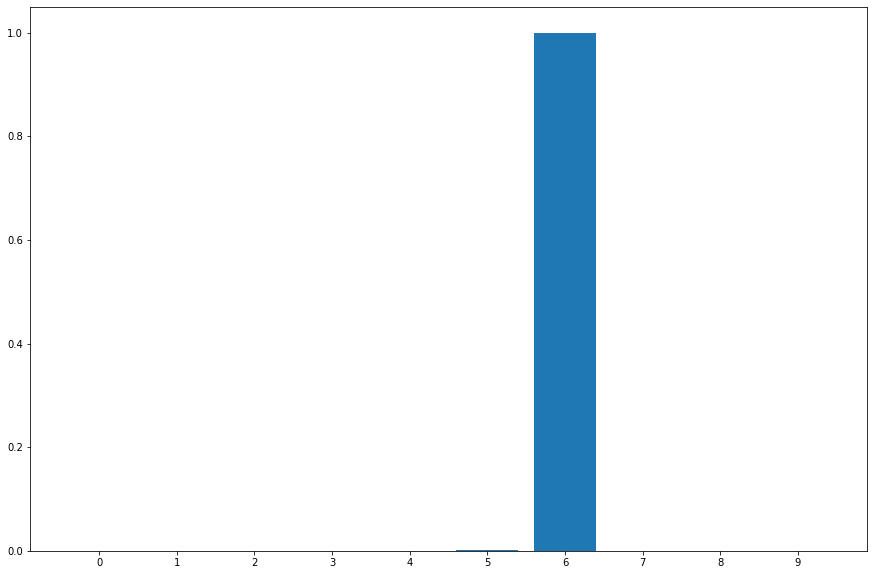

In [77]:
plt.bar(range(10), prediction[0])
plt.xticks(range(10), range(10))

https://www.gwern.net/Tanks

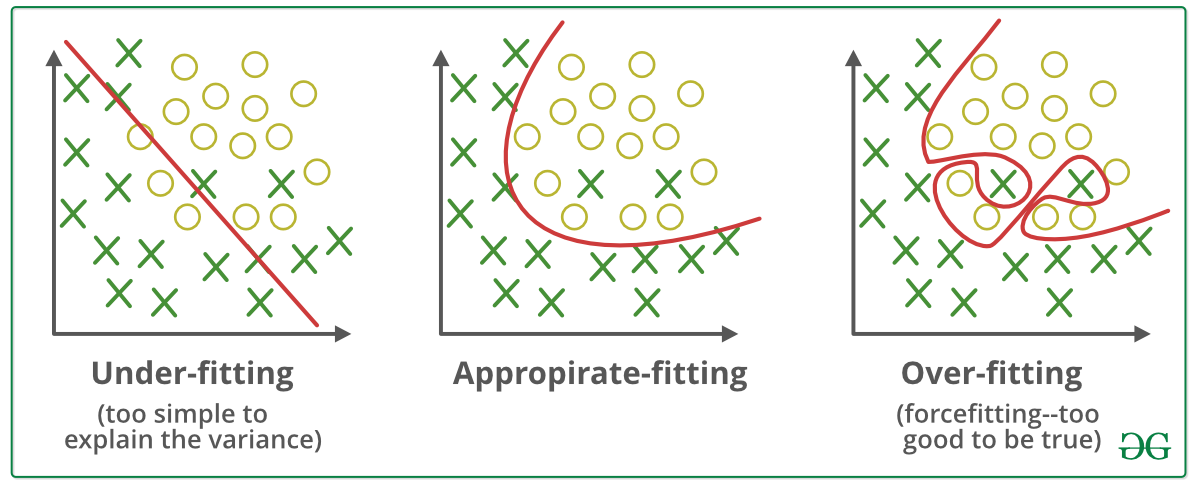

In [78]:
Image(filename='overfitting.png', width = 1000)

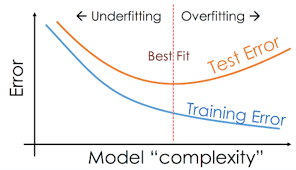

In [79]:
Image(filename='model_comp.png', width = 800)

In [80]:
ip = Input(shape=(784,), name="input")
x = Dense(units=2048, name="hiddel_layer", activation="relu")(ip)
x = Dense(units=2048, name="hiddel_layer_2", activation="relu")(x)
x = Dense(units=512, name="hiddel_layer_3", activation="relu")(x)
op = Dense(units=10, name="prediction", activation="softmax")(x)

model = Model(inputs=ip, outputs=op, name="full_model")

learning_rate = 0.001
optimizer = Adam(learning_rate, amsgrad=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model.summary()

Model: "full_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hiddel_layer (Dense)         (None, 2048)              1607680   
_________________________________________________________________
hiddel_layer_2 (Dense)       (None, 2048)              4196352   
_________________________________________________________________
hiddel_layer_3 (Dense)       (None, 512)               1049088   
_________________________________________________________________
prediction (Dense)           (None, 10)                5130      
Total params: 6,858,250
Trainable params: 6,858,250
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(X_train[:1000],
                   y_train[:1000],
                   batch_size=100,
                   epochs=10,
                   verbose=1,
                   validation_data=(X_test, y_test))

Epoch 1/10
10/10 [==============================] - 3s 334ms/step - loss: 1.5105 - accuracy: 0.4923 - val_loss: 0.9809 - val_accuracy: 0.7210
Epoch 2/10
10/10 [==============================] - 3s 289ms/step - loss: 0.4499 - accuracy: 0.8580 - val_loss: 0.5858 - val_accuracy: 0.8318
Epoch 3/10
10/10 [==============================] - 3s 290ms/step - loss: 0.2277 - accuracy: 0.9348 - val_loss: 0.4149 - val_accuracy: 0.8787
Epoch 4/10
10/10 [==============================] - 3s 282ms/step - loss: 0.0804 - accuracy: 0.9841 - val_loss: 0.5140 - val_accuracy: 0.8625
Epoch 5/10
10/10 [==============================] - 2s 258ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.4452 - val_accuracy: 0.8810
Epoch 6/10
10/10 [==============================] - 2s 234ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.4489 - val_accuracy: 0.8904
Epoch 7/10
10/10 [==============================] - 2s 234ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.4090 - val_accuracy: 0.9039
Epoch 

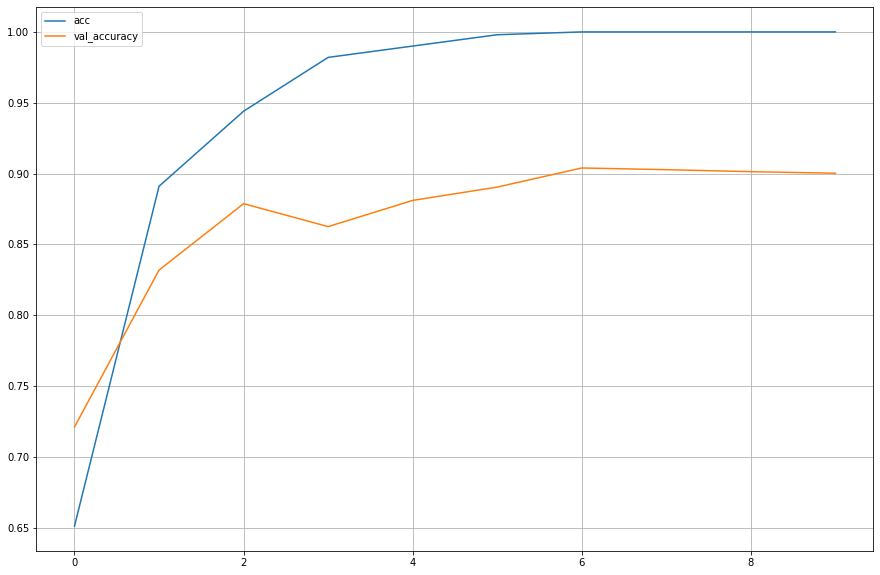

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.gca().legend(('acc','val_accuracy'))
plt.grid()

Regularization: L1, L2, augmentation

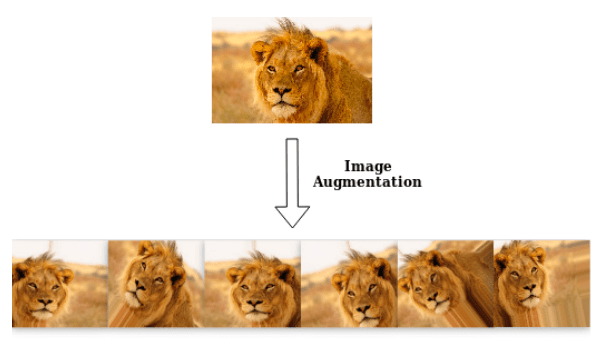

In [83]:
Image(filename='augmentation.png', width = 1000)

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=5&networkShape=3,2&seed=0.25772&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Deep Learning

Deep learning ( “DL“) is a subtype of machine learning. DL can process a wider range of data resources, requires less data preprocessing by humans (e.g. feature labelling), and can sometimes produce more accurate results than traditional ML approaches (although it requires a larger amount of data to do so).

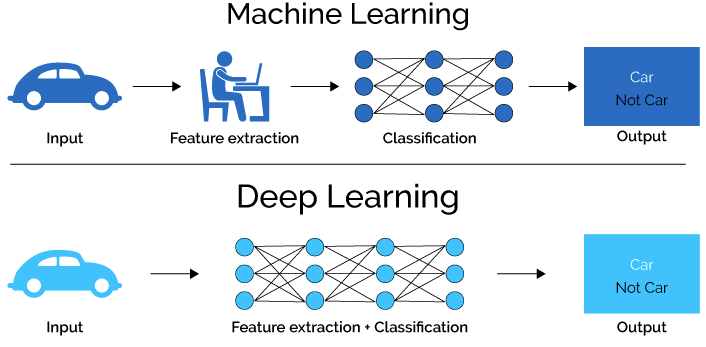

In [84]:
Image(filename='MLvsDL.png', width = 900)

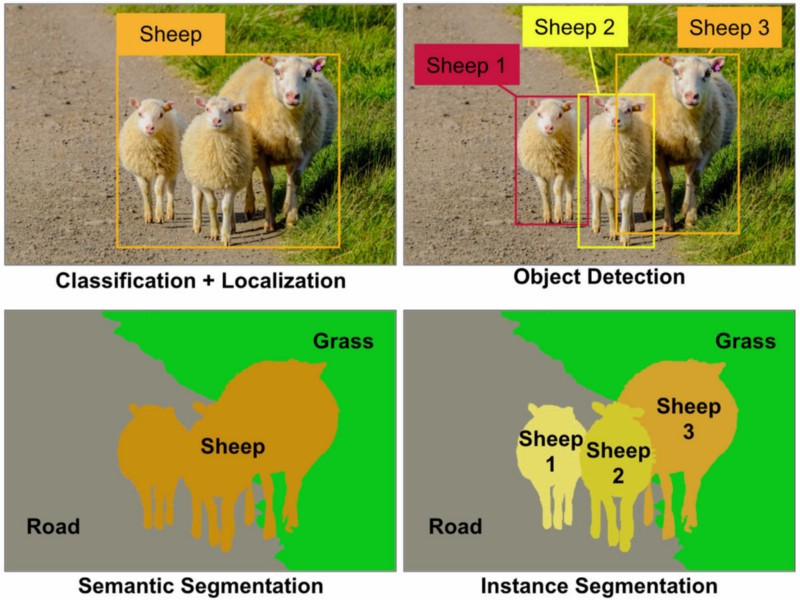

In [85]:
Image(filename='sheep.jpeg', width = 900)

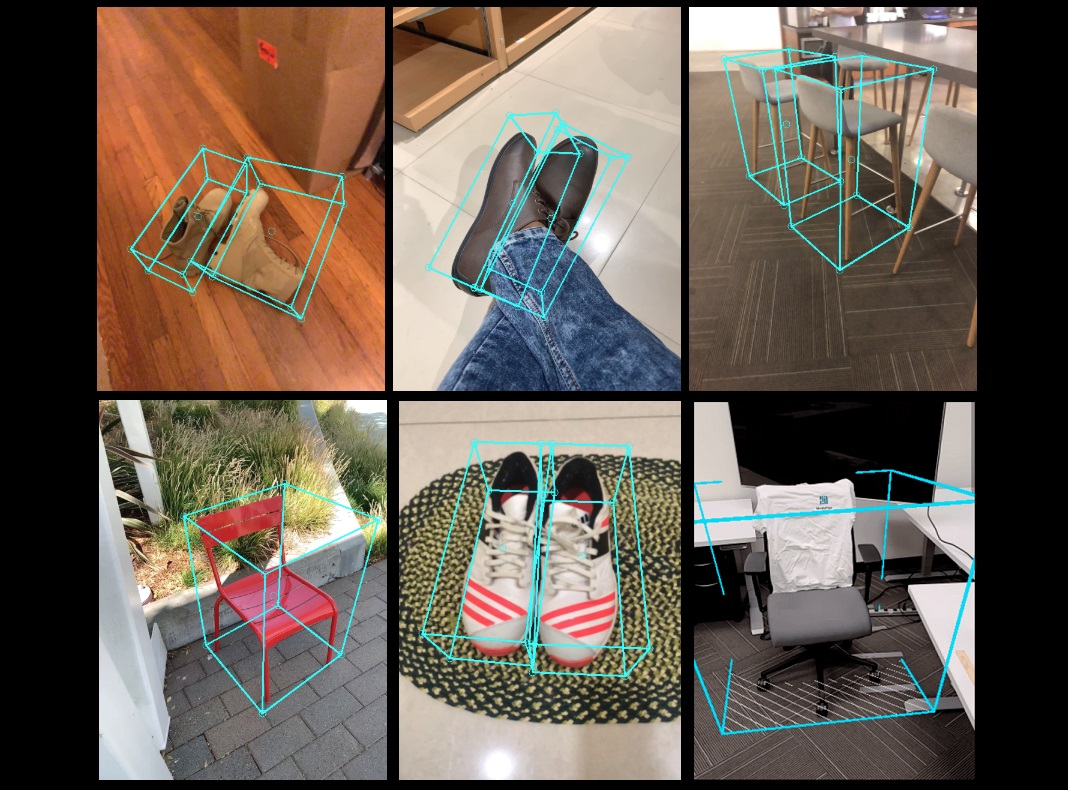

In [86]:
Image(filename='3d_detection.jpg', width = 900)

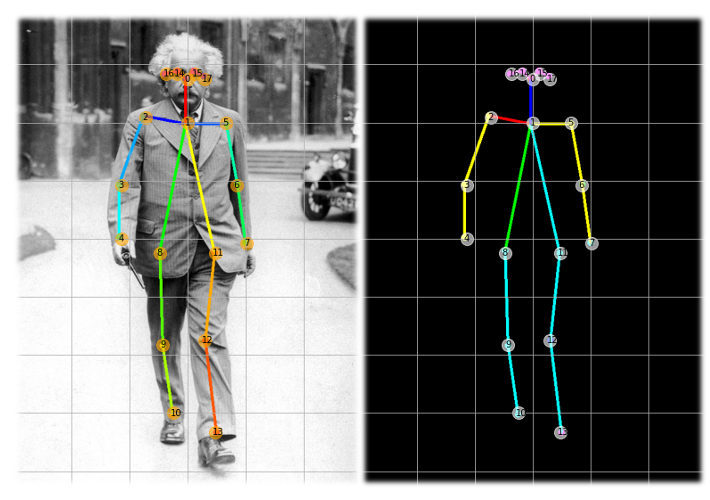

In [87]:
Image(filename='pose.png', width = 900)

## CNN (convolutional neural network)

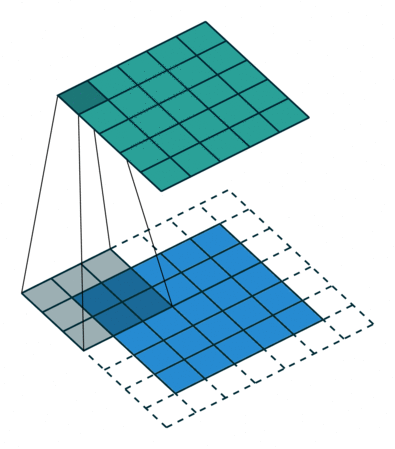

In [88]:
Image(filename='convolution.gif', width = 600)

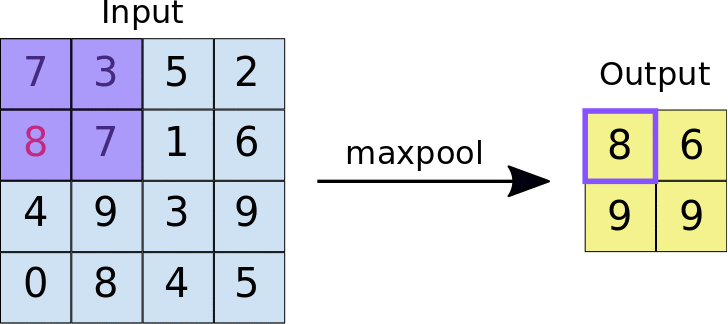

In [89]:
Image(filename='pooling.gif', width = 800)

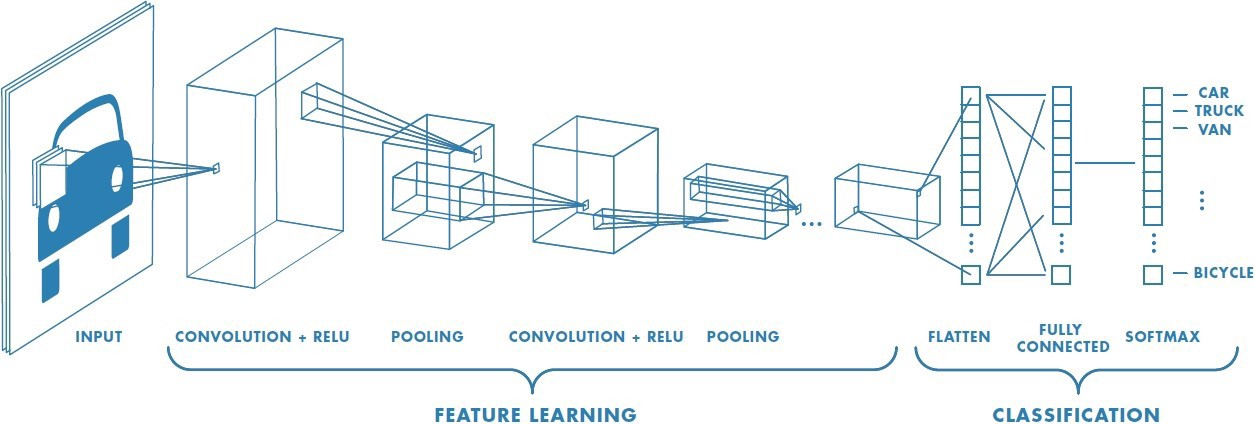

In [90]:
Image(filename='cnn.jpeg', width = 900)

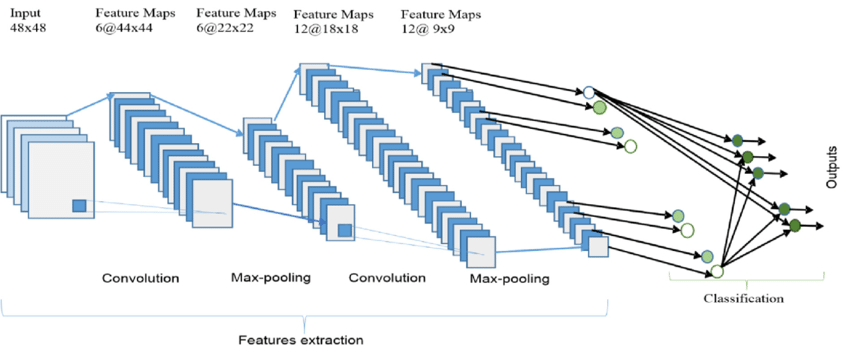

In [91]:
Image(filename='cnn_2.png', width = 900)

In [92]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_kernels = 8  # filters
kernel_size = 3
pool_size = 2

# Build the model.
model = Sequential([Conv2D(num_kernels, kernel_size, input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=pool_size),
                    Flatten(),
                    Dense(10, activation='softmax'),
                    ])

# Compile the model.
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model.
model.fit(train_images,
          to_categorical(train_labels),
          epochs=5,
          validation_data=(test_images, to_categorical(test_labels)),
          )

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5732 - accuracy: 0.8370 - val_loss: 0.1641 - val_accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1638 - accuracy: 0.9530 - val_loss: 0.1176 - val_accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1120 - accuracy: 0.9681 - val_loss: 0.0982 - val_accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0954 - accuracy: 0.9729 - val_loss: 0.0950 - val_accuracy: 0.9695
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0796 - accuracy: 0.9773 - val_loss: 0.0778 - val_accuracy: 0.9749


## RNN (Recurrent neural network)

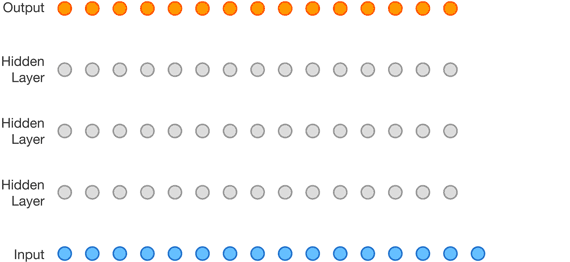

In [93]:
Image(filename='rnn.gif', width = 900)

### LSTM (Long short-term memory)

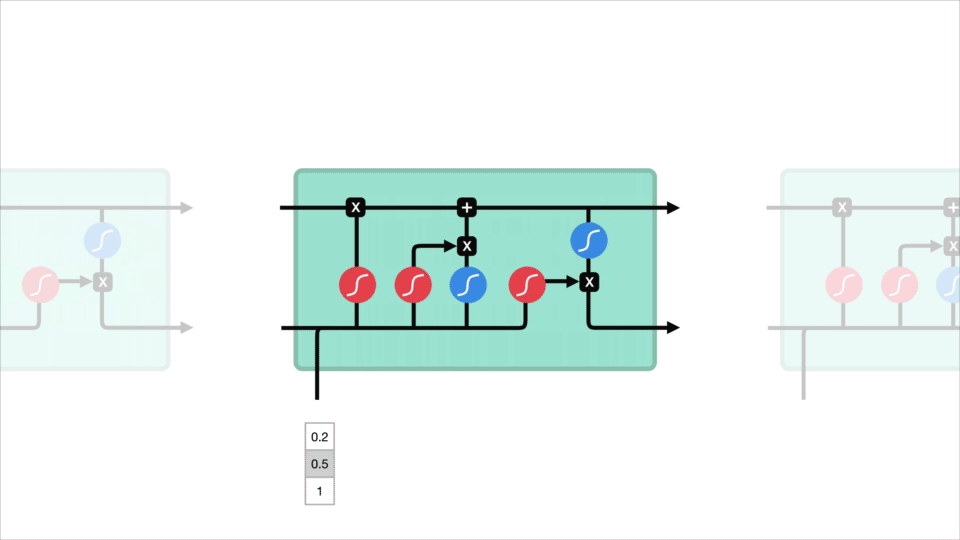

In [94]:
Image(filename='lstm.gif', width = 900)

### NLP (Natural Language Processing)

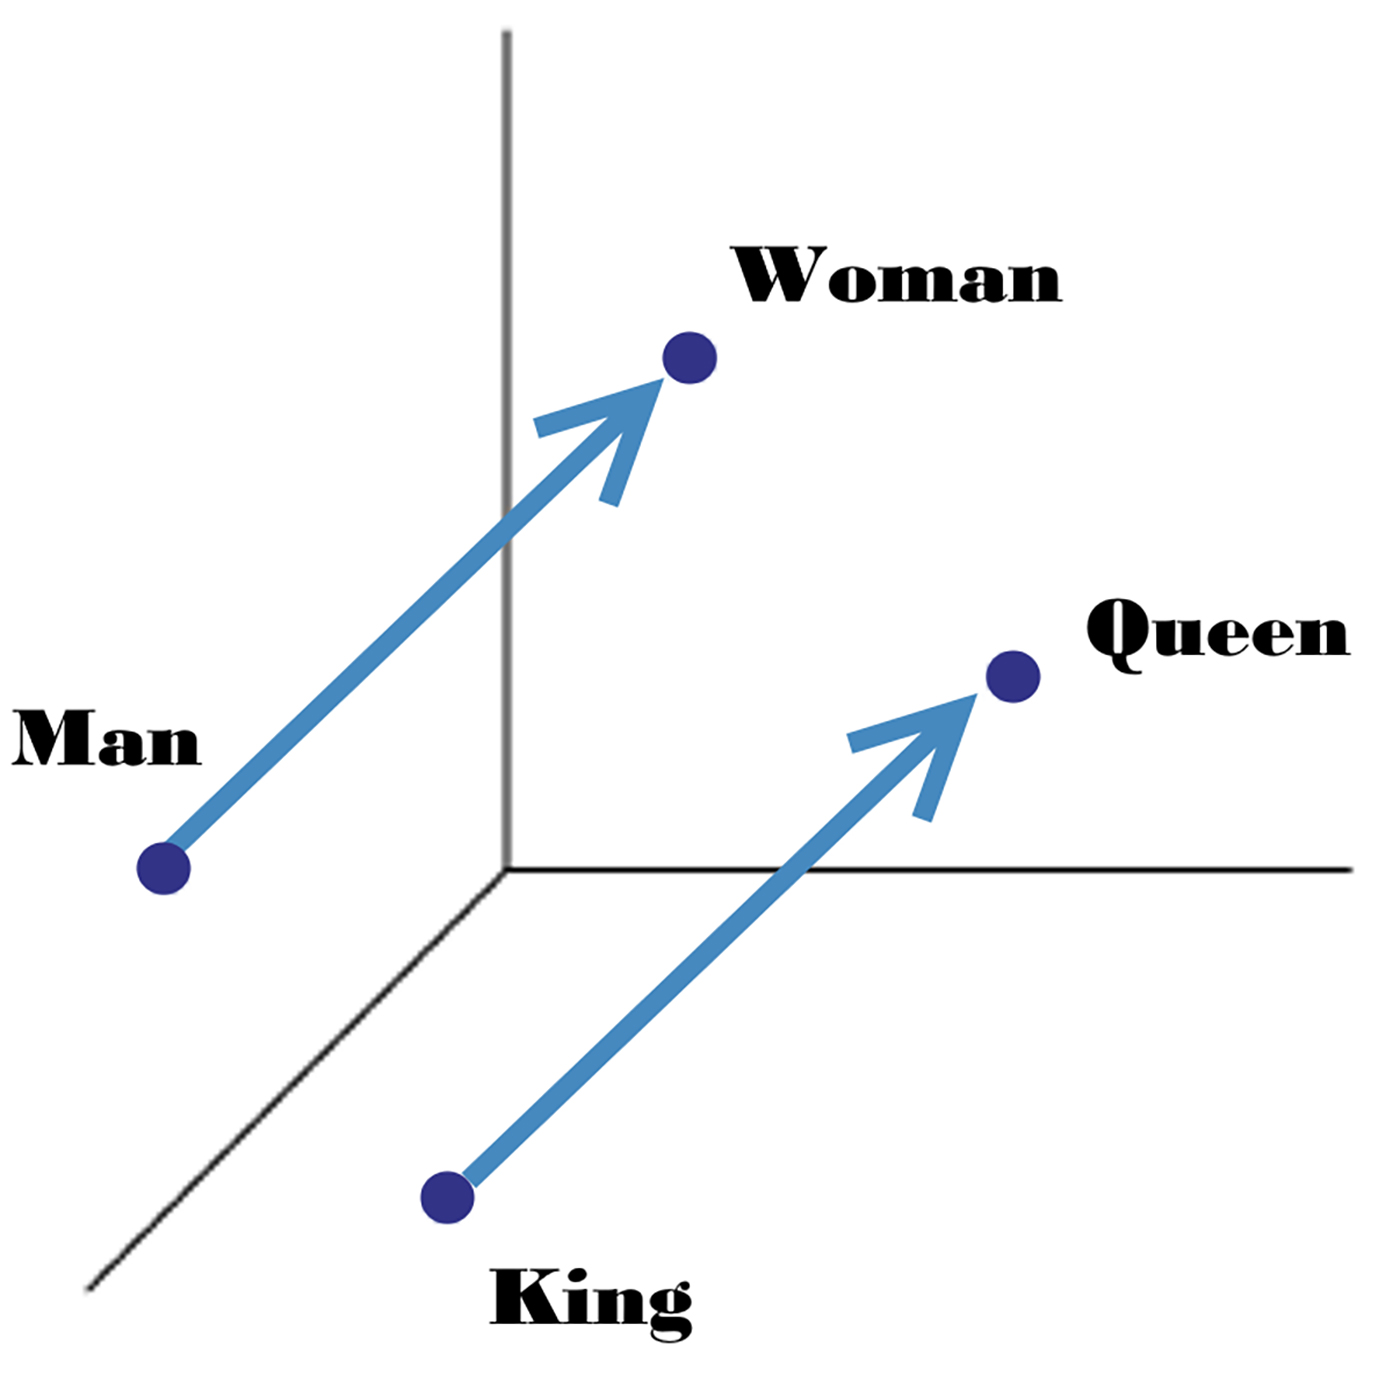

In [95]:
Image(filename='nlp.jpg', width = 700)

# Future

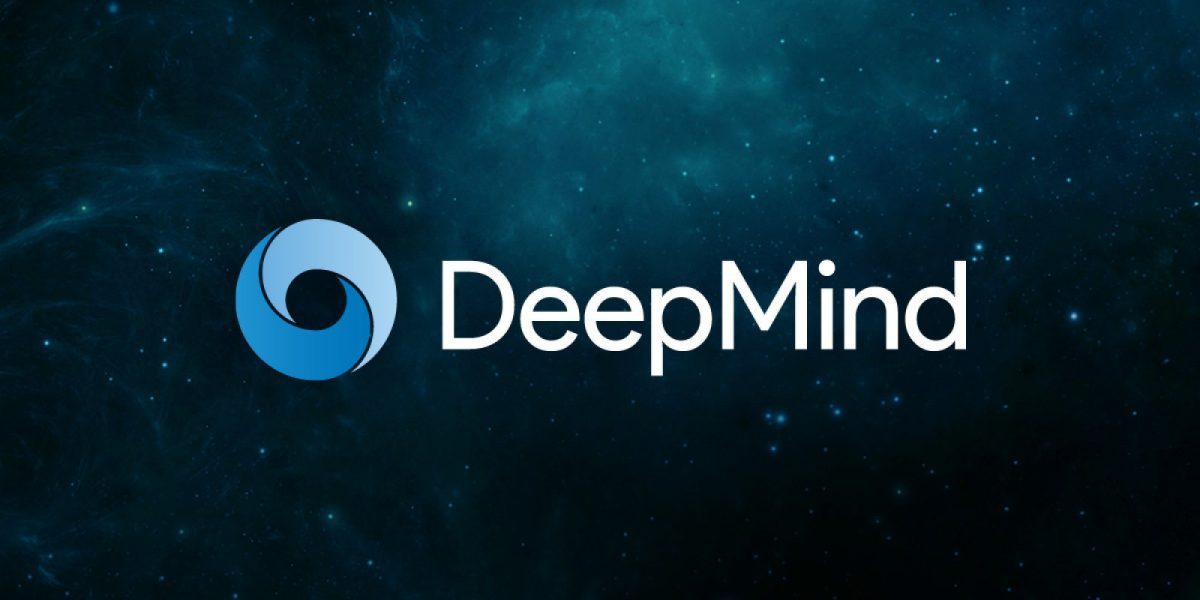

In [96]:
Image(filename='deepmind.jpg', width = 900)

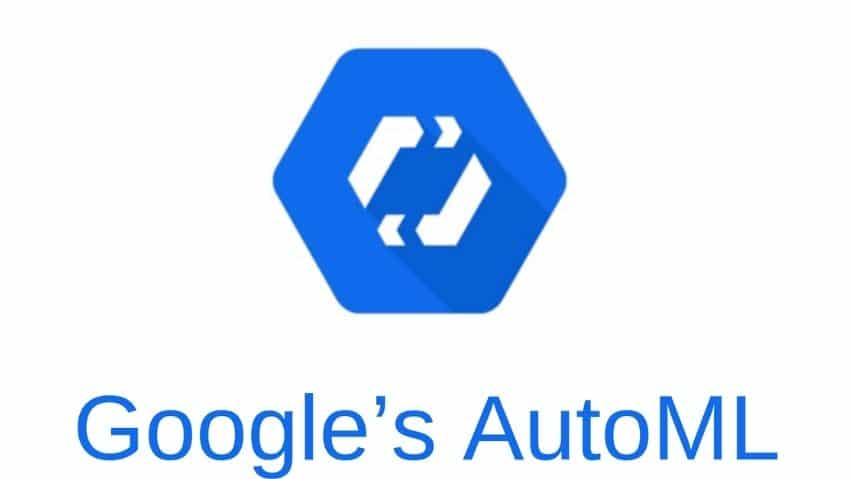

In [97]:
Image(filename='google-automl.jpg', width = 800)

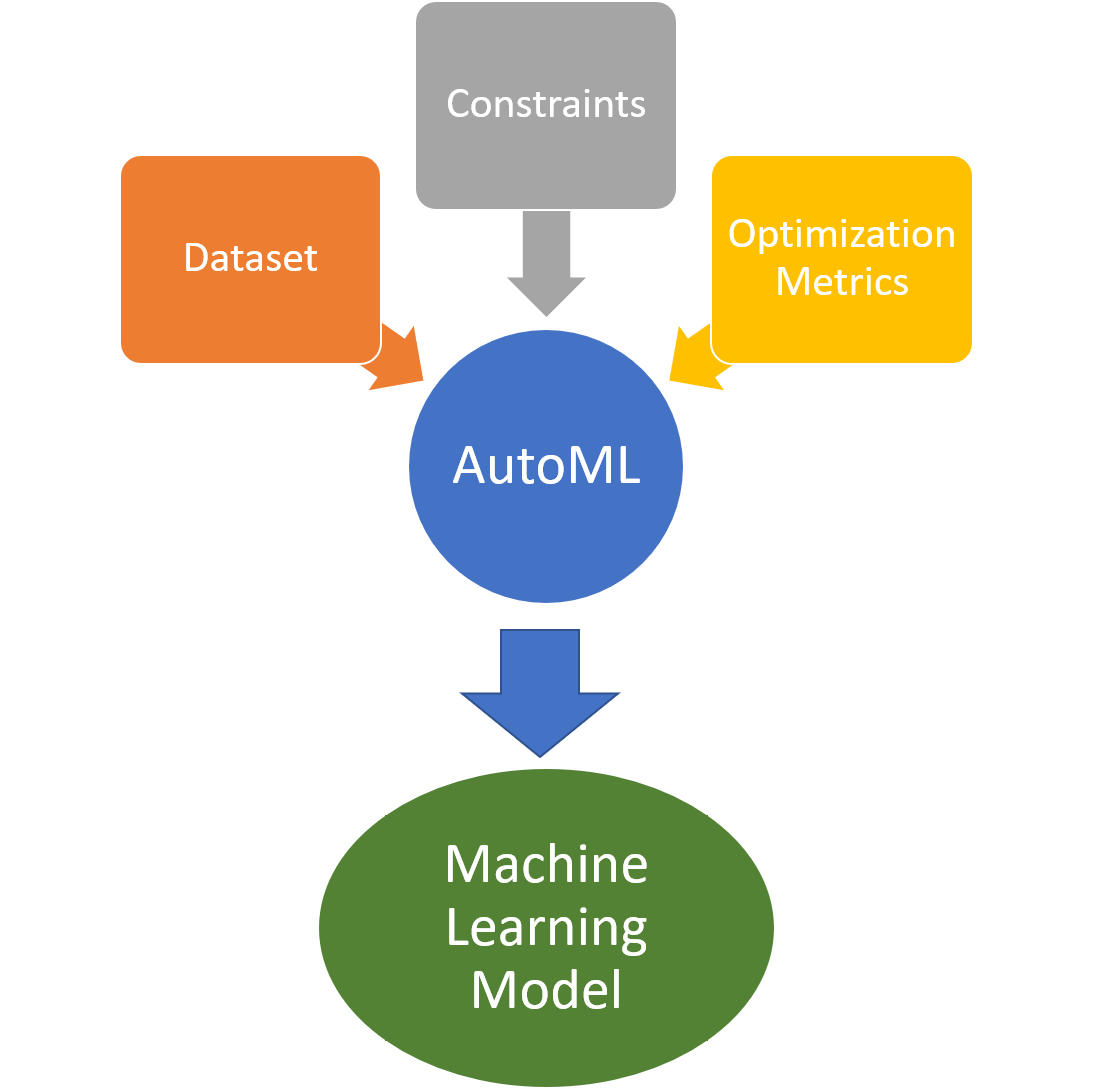

In [98]:
Image(filename='automl_2.png', width = 900)

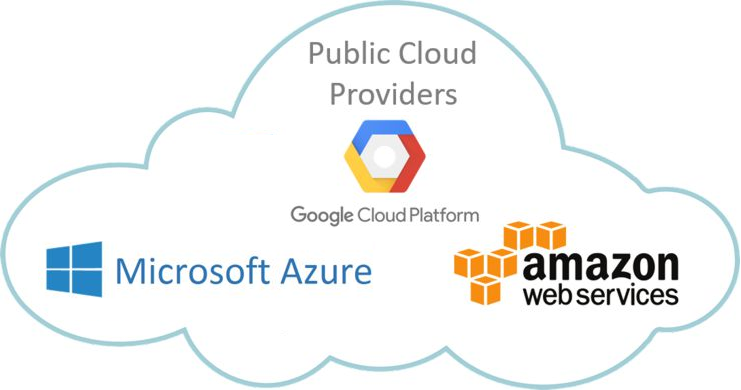

In [99]:
Image(filename='cloud.png', width = 900)